In [4]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Language Detection.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "basilb2s/language-detection",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
  pandas_kwargs={'encoding': 'latin-1'}
)

print("First 5 records:", df.head())

/tmp/ipython-input-4-2857071592.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:                                                 Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English


In [5]:
# Load the dataset
# Assuming the dataset is already loaded into a DataFrame named 'df' from the previous steps.
# If not, you would load it here, for example:
# import pandas as pd
# df = pd.read_csv('Language Detection.csv', encoding='latin-1')

print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())
print("\nDataset information:")
df.info()
print("\nLanguage distribution:")
display(df['Language'].value_counts())

Dataset shape: (10337, 2)

First 5 rows of the dataset:


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB

Language distribution:


,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df['Text']
y = df['Language']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8269,)
Shape of X_test: (2068,)
Shape of y_train: (8269,)
Shape of y_test: (2068,)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Shape of X_train_vec:", X_train_vec.shape)
print("Shape of X_test_vec:", X_test_vec.shape)

Shape of X_train_vec: (8269, 5000)
Shape of X_test_vec: (2068, 5000)


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9656673114119922


In [9]:
# Example of predicting on new text
new_text = ["This is a sentence in English.", "Esta es una oración en español.", "Ceci est une phrase en français."]

# Vectorize the new text using the same vectorizer fitted on the training data
new_text_vec = vectorizer.transform(new_text)

# Predict the language of the new text
predicted_language = model.predict(new_text_vec)

# Print the predictions
for text, language in zip(new_text, predicted_language):
  print(f"Text: '{text}' -> Predicted Language: {language}")

Text: 'This is a sentence in English.' -> Predicted Language: English
Text: 'Esta es una oración en español.' -> Predicted Language: Spanish
Text: 'Ceci est une phrase en français.' -> Predicted Language: French


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Vectorize the text data using CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000) # You can adjust max_features
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

print("Shape of X_train_count:", X_train_count.shape)
print("Shape of X_test_count:", X_test_count.shape)

# Initialize and train the Multinomial Naive Bayes model with CountVectorizer data
model_count = MultinomialNB()
model_count.fit(X_train_count, y_train)

# Predict on the test set
y_pred_count = model_count.predict(X_test_count)

# Evaluate the model
accuracy_count = accuracy_score(y_test, y_pred_count)
print("Accuracy with CountVectorizer:", accuracy_count)

Shape of X_train_count: (8269, 5000)
Shape of X_test_count: (2068, 5000)
Accuracy with CountVectorizer: 0.9724371373307543


In [11]:
from sklearn.metrics import classification_report

# Evaluate the model with TfidfVectorizer in more detail
print("Classification Report for Multinomial Naive Bayes with TfidfVectorizer:")
print(classification_report(y_test, y_pred))

# Evaluate the model with CountVectorizer in more detail
print("\nClassification Report for Multinomial Naive Bayes with CountVectorizer:")
print(classification_report(y_test, y_pred_count))

Classification Report for Multinomial Naive Bayes with TfidfVectorizer:
              precision    recall  f1-score   support

      Arabic       1.00      0.96      0.98       106
      Danish       0.98      0.89      0.94        73
       Dutch       0.99      0.95      0.97       111
     English       0.88      1.00      0.94       291
      French       0.98      0.98      0.98       219
      German       1.00      0.95      0.97        93
       Greek       1.00      0.99      0.99        68
       Hindi       0.00      0.00      0.00        10
     Italian       0.99      0.98      0.99       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       0.97      1.00      0.98       121
  Portugeese       0.99      0.95      0.97       144
     Russian       1.00      0.99      1.00       136
     Spanish       0.96      0.97      0.97       160
    Sweedish       0.96      0.97      0.96       133
       Tamil       0.93      0.98      0.96        87
     Turk

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-12-1752324842.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Language', order=df['Language'].value_counts().index, palette='viridis')


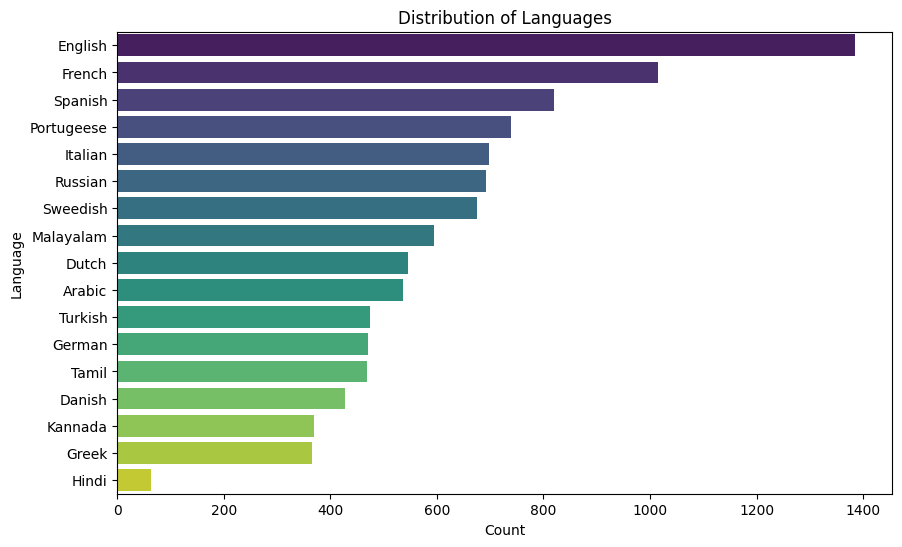

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the language distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Language', order=df['Language'].value_counts().index, palette='viridis')
plt.title('Distribution of Languages')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


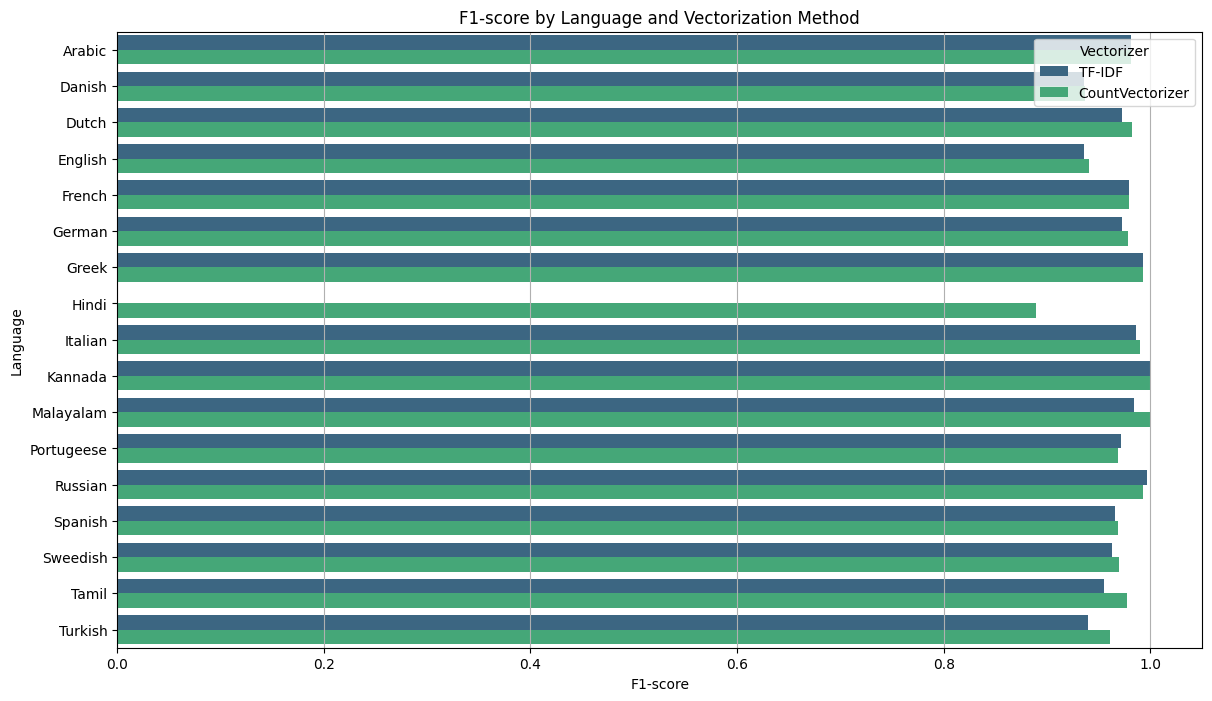

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract classification report data for TF-IDF model
report_tfidf = classification_report(y_test, y_pred, output_dict=True)
df_report_tfidf = pd.DataFrame(report_tfidf).transpose().reset_index().rename(columns={'index': 'Language'})
df_report_tfidf['Vectorization'] = 'TF-IDF'

# Extract classification report data for CountVectorizer model
report_count = classification_report(y_test, y_pred_count, output_dict=True)
df_report_count = pd.DataFrame(report_count).transpose().reset_index().rename(columns={'index': 'Language'})
df_report_count['Vectorization'] = 'CountVectorizer'

# Combine the dataframes and filter out aggregate rows
df_combined_report = pd.concat([df_report_tfidf, df_report_count])
df_combined_report = df_combined_report[~df_combined_report['Language'].isin(['accuracy', 'macro avg', 'weighted avg'])]

# Visualize F1-score for each language and vectorization method
plt.figure(figsize=(14, 8))
sns.barplot(data=df_combined_report, x='f1-score', y='Language', hue='Vectorization', palette='viridis')
plt.title('F1-score by Language and Vectorization Method')
plt.xlabel('F1-score')
plt.ylabel('Language')
plt.legend(title='Vectorizer')
plt.grid(axis='x')
plt.show()